# **Project 2**, APS1070 Fall 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 27, 9 PM - 13 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Anbumanivel Mohan Suganthi
*   Student Number: 1008696653

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features? Time and Amount **[0.1]**
* Which column contains the targets? Class**[0.1]**
* What is the meaning of target values? It represents whether the transaction is fraudulent or non-fraudulent. 1 refers to fraudulent and 0 is non-fraudulent **[0.1]**

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
rows_count = len(df.index)
total_columns = df.columns
Class_value = df.Class.unique()
print("Total number of Rows: ", rows_count)
print("Total Column Values: ", total_columns)
print("Target Values: ", Class_value)

Total number of Rows:  284807
Total Column Values:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Target Values:  [0 1]


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? Class 0 = 99.827%,
Class 1 = 0.173% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? This dataset is considered to be unbalanced. Because the entries for class 0 is highly larger than class 1. **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? prediction on new samples will be inaccurate. Because the classifier is trained on more samples in a particular class. The classifier cannot predict the class with which it is trained on fewer samples. There will be a lot of false positives and false negatives. **[0.5]**
* What metrics should we use to evaluate a model in such cases Precision, Recall and F1 score **[0.2]**


In [ ]:
Class_count_0=df.Class.value_counts()[0]
Class_count_1=df.Class.value_counts()[1]

Class_0_percentage = (Class_count_0/rows_count)
Class_1_percentage = (Class_count_1/rows_count)
print("percenge of class 0 entries: {:.3%}".format(Class_0_percentage))
print("percenge of class 1 entries: {:.3%}".format(Class_1_percentage))

percenge of class 0 entries: 99.827%
percenge of class 1 entries: 0.173%


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
from sklearn.model_selection import train_test_split
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X=df.drop(columns='Class')
y=df['Class']
X_val_train, X_test, y_val_train, y_test = train_test_split(X,y,test_size=0.15,random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_val_train,y_val_train,test_size=56960,random_state=40)
print(X_val_train.shape)
print(X_train.shape,X_val.shape,X_test.shape)

(242085, 30)
(185125, 30) (56960, 30) (42722, 30)


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

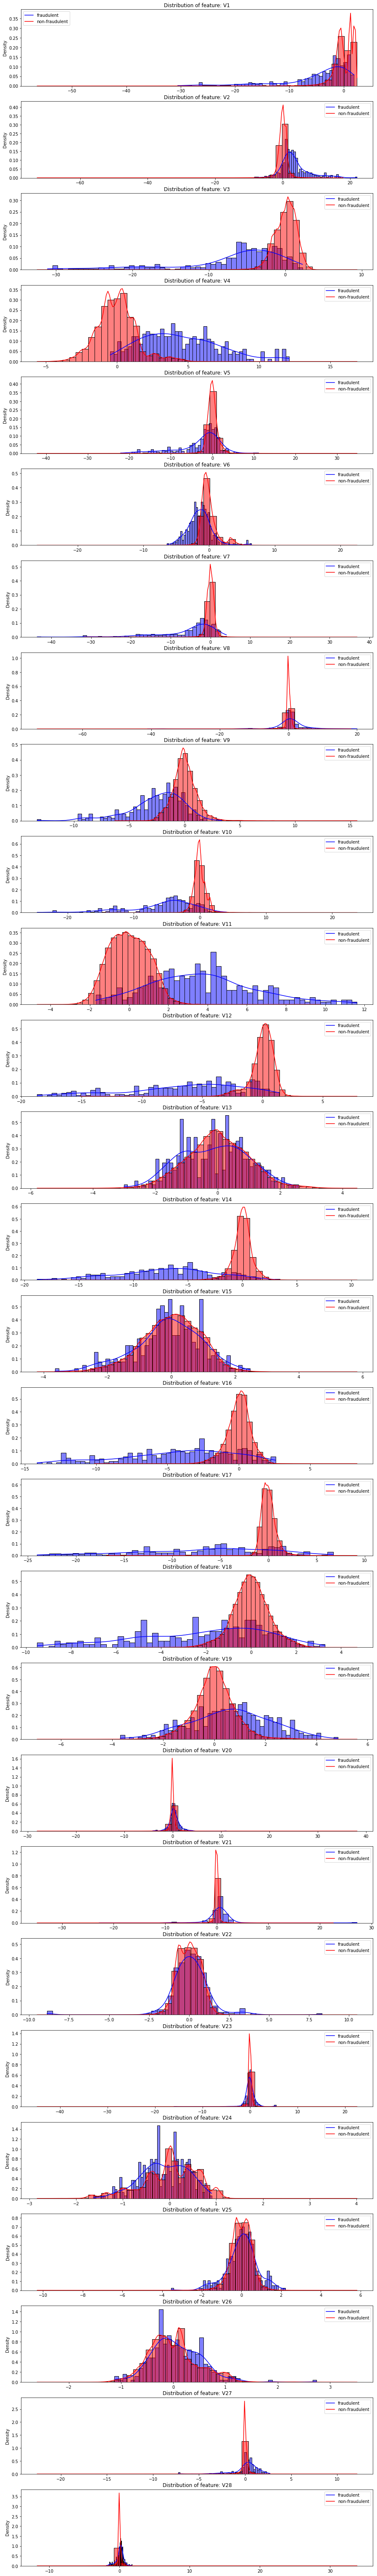

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Answer: These graphs provide information about range of values for fraudulent and non-fraudulent class on each feature. The features with a most variation in values between the two class can be used to fit the gaussian model for anomaly detection.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step.
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


Answer a.7:
The Big O notation for optimal threshold is O(n^2). The time is calculated below.

Answer b.4:
No, the results are not similar. The results are different for part a and part b. The precision and F1 score values are higher and recall is lower in part b than in part a. Because for part b the model is fit using only non-fraudulent transactions in the training set, so that the model performs better when the samples are of same class than when the model is fit with unbalanced data.

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
AUC for training:  0.6925390552699681
AUC for validation:  0.7161214832410152


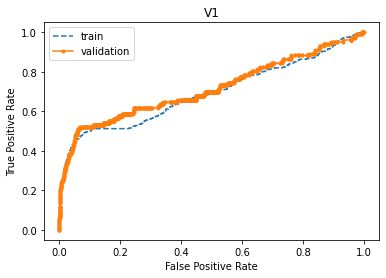

AUC for training:  0.8482422259083141
AUC for validation:  0.8524604466993452


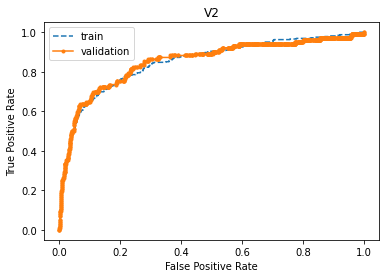

AUC for training:  0.870004194159011
AUC for validation:  0.8567566672805109


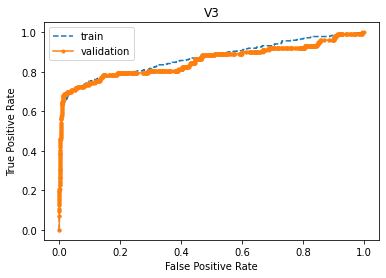

AUC for training:  0.8897160189011746
AUC for validation:  0.8832790529416592


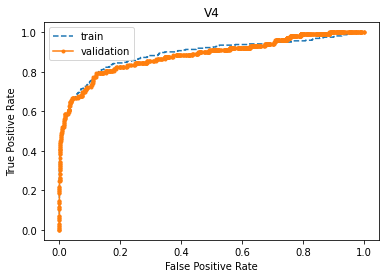

AUC for training:  0.7611507274676209
AUC for validation:  0.7811691527361939


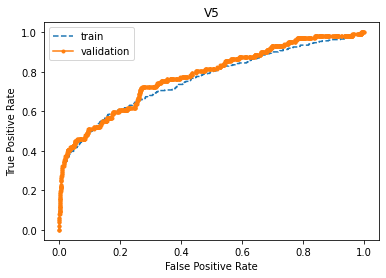

AUC for training:  0.7279959492201247
AUC for validation:  0.7214214082692418


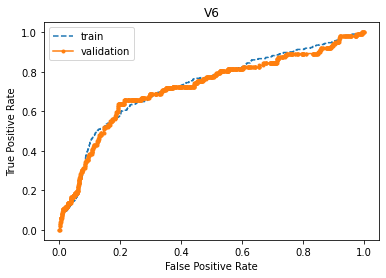

AUC for training:  0.8654964563070233
AUC for validation:  0.8871652393061766


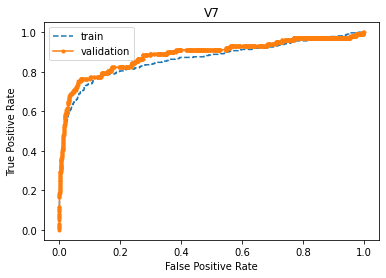

AUC for training:  0.7749004202326176
AUC for validation:  0.7903295723298289


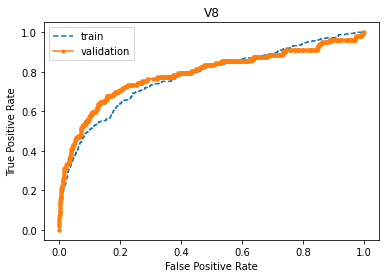

AUC for training:  0.7992773772225404
AUC for validation:  0.7943383551317041


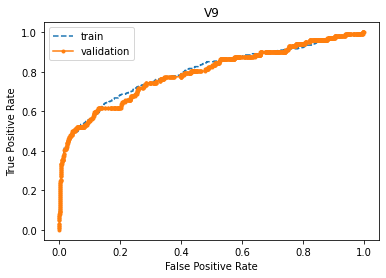

AUC for training:  0.9100230888806455
AUC for validation:  0.9172899945443723


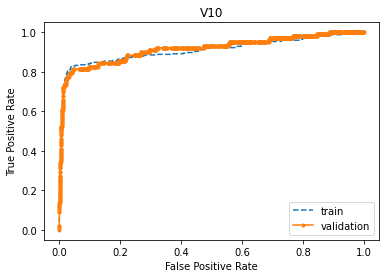

AUC for training:  0.8991276021540211
AUC for validation:  0.8800913731421726


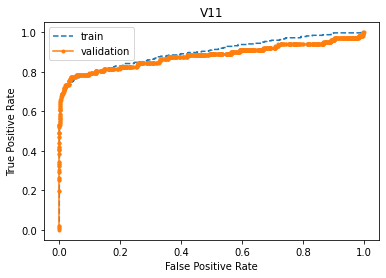

AUC for training:  0.9119041922197291
AUC for validation:  0.89286261129377


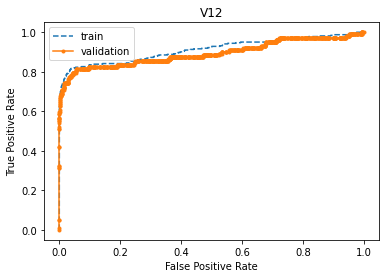

AUC for training:  0.562528293096261
AUC for validation:  0.5676415066360709


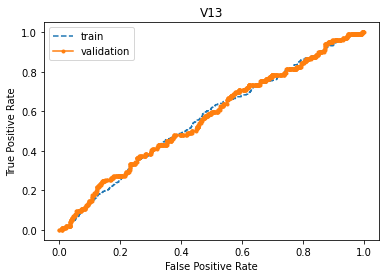

AUC for training:  0.9480139721051959
AUC for validation:  0.9550655606433365


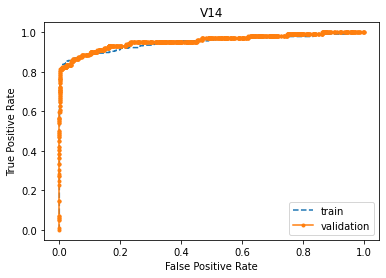

AUC for training:  0.5196648719403503
AUC for validation:  0.5360914600459763


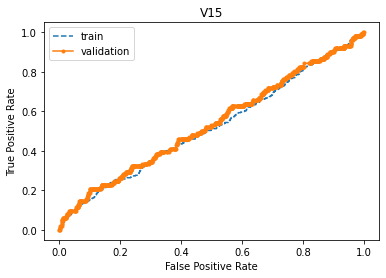

AUC for training:  0.8963828798321181
AUC for validation:  0.8963285901789045


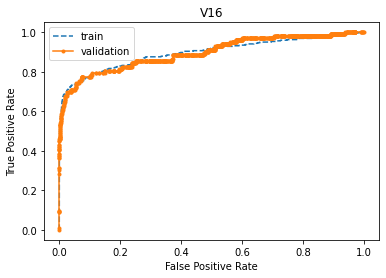

AUC for training:  0.9289361782361967
AUC for validation:  0.9256991445493037


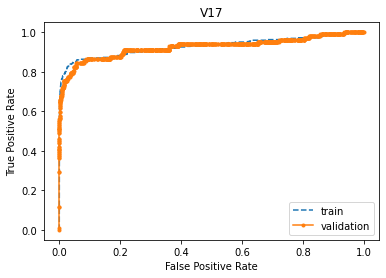

AUC for training:  0.8054701728209288
AUC for validation:  0.7841456080128066


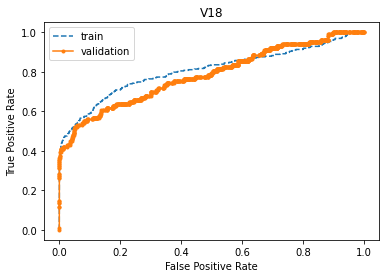

AUC for training:  0.747453365062269
AUC for validation:  0.7002649876300022


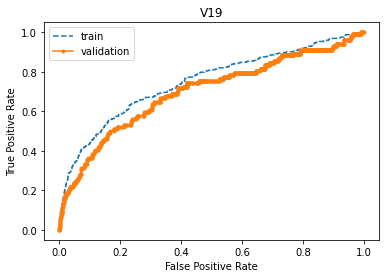

AUC for training:  0.7232314161768298
AUC for validation:  0.7559872237614311


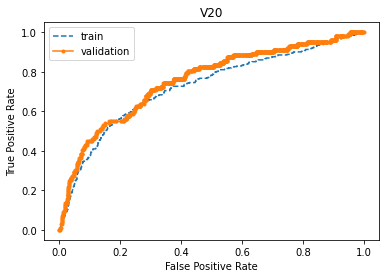

AUC for training:  0.8129653120968197
AUC for validation:  0.8613813635482683


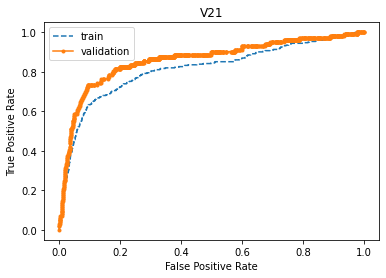

AUC for training:  0.5471789113154337
AUC for validation:  0.5568906094922403


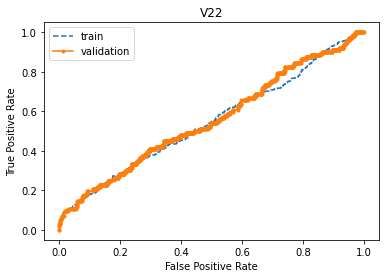

AUC for training:  0.6870895389930582
AUC for validation:  0.6870328489480846


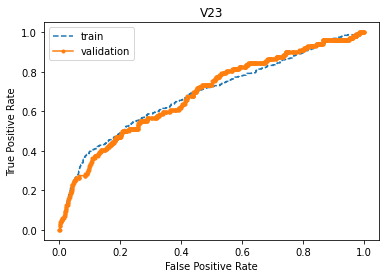

AUC for training:  0.4814737251011931
AUC for validation:  0.47282445638567083


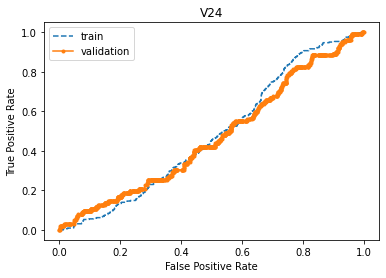

AUC for training:  0.5720508556988484
AUC for validation:  0.5879516497583591


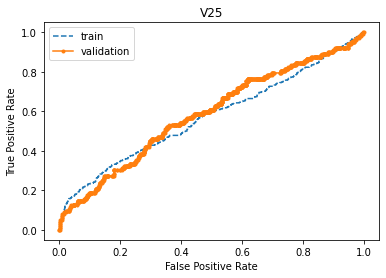

AUC for training:  0.4998318336836981
AUC for validation:  0.49896008563473226


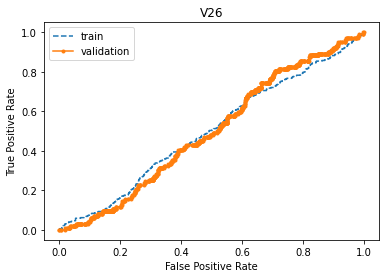

AUC for training:  0.8177128386134733
AUC for validation:  0.839330040644771


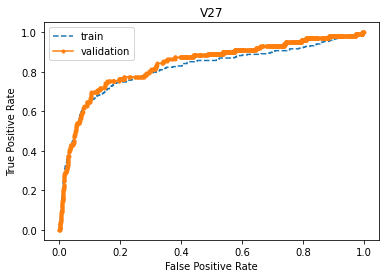

AUC for training:  0.8029875896384273
AUC for validation:  0.8010799521891138


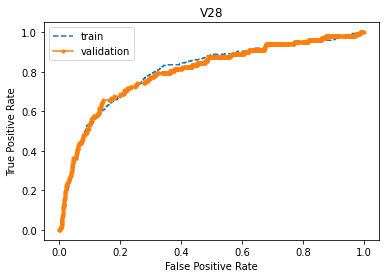

AUC for training  [0.6925390552699681, 0.8482422259083141, 0.870004194159011, 0.8897160189011746, 0.7611507274676209, 0.7279959492201247, 0.8654964563070233, 0.7749004202326176, 0.7992773772225404, 0.9100230888806455, 0.8991276021540211, 0.9119041922197291, 0.562528293096261, 0.9480139721051959, 0.5196648719403503, 0.8963828798321181, 0.9289361782361967, 0.8054701728209288, 0.747453365062269, 0.7232314161768298, 0.8129653120968197, 0.5471789113154337, 0.6870895389930582, 0.4814737251011931, 0.5720508556988484, 0.4998318336836981, 0.8177128386134733, 0.8029875896384273]
AUC for validation  [0.7161214832410152, 0.8524604466993452, 0.8567566672805109, 0.8832790529416592, 0.7811691527361939, 0.7214214082692418, 0.8871652393061766, 0.7903295723298289, 0.7943383551317041, 0.9172899945443723, 0.8800913731421726, 0.89286261129377, 0.5676415066360709, 0.9550655606433365, 0.5360914600459763, 0.8963285901789045, 0.9256991445493037, 0.7841456080128066, 0.7002649876300022, 0.7559872237614311, 0.861

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from timeit import default_timer

features=[f for f in df.columns if 'V' in f]
print(features)
gm = GaussianMixture( n_components=1)
auc_train = []
auc_val = []
for feat in features:
  gm.fit(X_train[feat].to_numpy().reshape(-1,1))
  c = gm.score_samples(X_train[feat].to_numpy().reshape(-1,1))
  d = gm.score_samples(X_val[feat].to_numpy().reshape(-1,1))
  fpr_train, tpr_train, _ = roc_curve(y_train, -1 * c)
  fpr_val, tpr_val, _ = roc_curve(y_val, -1 * d)
  auc_train_single = auc(fpr_train, tpr_train)
  auc_val_single = auc(fpr_val, tpr_val)
  print("AUC for training: ", auc_train_single)
  print("AUC for validation: ", auc_val_single)
  auc_train.append(auc_train_single)
  auc_val.append(auc_val_single)
  plt.plot(fpr_train, tpr_train, linestyle = '--', label='train')
  plt.plot(fpr_val, tpr_val, marker='.', label='validation')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(feat)
  plt.legend()
  plt.show()
print("AUC for training ", auc_train)
print("AUC for validation ", auc_val)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
a={}
best_feature = []
sort_a=[]
for i,feat in enumerate(features):
  a[feat]= auc_val[i]

#print(a)
sorted_feature=[]
sorted_auc_val=[]

sort_a=(sorted(a.items(), key=lambda a: a[1]))
#print(sort_a)
for i in range (0,len(sort_a)):
  sorted_feature.append(sort_a[i][0])
  sorted_auc_val.append(sort_a[i][1])
#print(sorted_feature)
#print(sorted_auc_val)
best_three = []
for i in range (1,4):
  best_three.append(sorted_feature[-i])
print("the best 3 features are ", best_three )

tr = list(np.arange(-30,10,0.5))
b={}
sort_b=[]
maximum_tr=[]
feature = sorted_feature[-3:]

for i in feature:
  start = default_timer()
  d = gm.score_samples(X_val[i].to_numpy().reshape(-1,1))
  f1_best=[]
  for j in tr:
    f1score = f1_score(y_val, d < j)
    b[j]=f1score
  #print(b)
  sort_b=(sorted(b.items(), key=lambda a: a[1]))
  #print(sort_b)
  sorted_tr=[]
  sorted_f1=[]
  for k in range (0,len(sort_b)):
    sorted_tr.append(sort_b[k][0])
    sorted_f1.append(sort_b[k][1])
  maximum_tr.append(sorted_tr[-1])
print("the best treshold value for the best three features ", best_three, "is ", maximum_tr)
end = default_timer()-start
print("The time taken for finding optimal threshold: ", end)

precision_pr=[]
recall_rc=[]
f1score_f1=[]
for i in best_three:
  d = gm.score_samples(X_train[i].to_numpy().reshape(-1,1))
  pr_train = precision_score(y_train, d<maximum_tr[best_three.index(i)])
  rc_train = recall_score(y_train, d<maximum_tr[best_three.index(i)])
  f1_train = f1_score(y_train, d<maximum_tr[best_three.index(i)])
  precision_pr.append(pr_train)
  recall_rc.append(rc_train)
  f1score_f1.append(f1_train)
precision_pr_val=[]
recall_rc_val=[]
f1score_f1_val=[]
for i in best_three:
  d = gm.score_samples(X_val[i].to_numpy().reshape(-1,1))
  pr_train = precision_score(y_val, d<maximum_tr[best_three.index(i)])
  rc_train = recall_score(y_val, d<maximum_tr[best_three.index(i)])
  f1_train = f1_score(y_val, d<maximum_tr[best_three.index(i)])
  precision_pr_val.append(pr_train)
  recall_rc_val.append(rc_train)
  f1score_f1_val.append(f1_train)
data_all= {'Features': best_three, 'precision_train': precision_pr, 'Recall_train': recall_rc, 'F1 score_train': f1score_f1, 'precision_val': precision_pr_val, 'Recall_val': recall_rc_val, 'F1 score_val': f1score_f1_val}
table_all=pd.DataFrame(data=data_all)
table_all

the best 3 features are  ['V14', 'V17', 'V10']
the best treshold value for the best three features  ['V14', 'V17', 'V10'] is  [-30.0, -30.0, -30.0]
The time taken for finding optimal threshold:  1.5978722750000998


,Features,precision_train,Recall_train,F1 score_train,precision_val,Recall_val,F1 score_val
0,V14,0.090301,0.838509,0.163043,0.091803,0.823529,0.165192
1,V17,0.155118,0.757764,0.257520,0.148069,0.676471,0.242958
2,V10,0.071070,0.748447,0.129814,0.073457,0.735294,0.133571


In [ ]:
#part b
gm_b = GaussianMixture( n_components=1)
auc_train_b = []
auc_val_b = []
for feat in best_three:
  gm_b.fit(X_train[feat][y_train==0].to_numpy().reshape(-1,1))
  c = gm_b.score_samples(X_train[feat].to_numpy().reshape(-1,1))
  d = gm_b.score_samples(X_val[feat].to_numpy().reshape(-1,1))
  fpr_train_b, tpr_train_b, _ = roc_curve(y_train, -1 * c)
  fpr_val_b, tpr_val_b, _ = roc_curve(y_val, -1 * d)
  auc_train_single_b = auc(fpr_train_b, tpr_train_b)
  auc_val_single_b = auc(fpr_val_b, tpr_val_b)
  auc_train_b.append(auc_train_single_b)
  auc_val_b.append(auc_val_single_b)
  #plt.plot(fpr_train_b, tpr_train_b, linestyle = '--', label='train')
  #plt.plot(fpr_val_b, tpr_val_b, marker='.', label='validation')
  #plt.xlabel('False Positive Rate')
  #plt.ylabel('True Positive Rate')
  #plt.legend()
  #plt.show()
print("AUC for training ", auc_train_b)
print("AUC for validation ", auc_val_b)

tr_b = list(np.arange(-30,10,0.5))
b_b={}
sort_c=[]
maximum_tr_b=[]
feature_b = sorted_feature[-3:]
for i in feature_b:
  d_b = gm_b.score_samples(X_val[i].to_numpy().reshape(-1,1))
  f1_best_b=[]
  for j in tr_b:
    f1score_b = f1_score(y_val, d < j)
    b_b[j]=f1score_b
  #print(b_b)
  sort_c=(sorted(b_b.items(), key=lambda a: a[1]))
  #print(sort_c)
  sorted_tr_b=[]
  sorted_f1_b=[]
  for k in range (0,len(sort_c)):
    sorted_tr_b.append(sort_c[k][0])
    sorted_f1_b.append(sort_c[k][1])
  maximum_tr_b.append(sorted_tr_b[-1])
print("the best treshold value for the best three features ", best_three, "is ", maximum_tr_b)

precision_pr_b=[]
recall_rc_b=[]
f1score_f1_b=[]
for i in best_three:
  d = gm_b.score_samples(X_train[i].to_numpy().reshape(-1,1))
  pr_train_b = precision_score(y_train, d<maximum_tr_b[best_three.index(i)])
  rc_train_b = recall_score(y_train, d<maximum_tr_b[best_three.index(i)])
  f1_train_b = f1_score(y_train, d<maximum_tr_b[best_three.index(i)])
  precision_pr_b.append(pr_train_b)
  recall_rc_b.append(rc_train_b)
  f1score_f1_b.append(f1_train_b)
precision_pr_val_b=[]
recall_rc_val_b=[]
f1score_f1_val_b=[]
for i in best_three:
  d = gm_b.score_samples(X_val[i].to_numpy().reshape(-1,1))
  pr_train_b = precision_score(y_val, d<maximum_tr_b[best_three.index(i)])
  rc_train_b = recall_score(y_val, d<maximum_tr_b[best_three.index(i)])
  f1_train_b = f1_score(y_val, d<maximum_tr_b[best_three.index(i)])
  precision_pr_val_b.append(pr_train_b)
  recall_rc_val_b.append(rc_train_b)
  f1score_f1_val_b.append(f1_train_b)
data_all_b= {'Features': best_three, 'precision_train': precision_pr_b, 'Recall_train': recall_rc_b, 'F1 score_train': f1score_f1_b, 'precision_val': precision_pr_val_b, 'Recall_val': recall_rc_val_b, 'F1 score_val': f1score_f1_val_b}
table_all_b=pd.DataFrame(data=data_all_b)
table_all_b

AUC for training  [0.9483173503912157, 0.9283975654047992, 0.910166215943296]
AUC for validation  [0.9549152032686865, 0.9252677292380951, 0.9172770624307269]
the best treshold value for the best three features  ['V14', 'V17', 'V10'] is  [-30.0, -30.0, -30.0]


,Features,precision_train,Recall_train,F1 score_train,precision_val,Recall_val,F1 score_val
0,V14,0.821918,0.372671,0.512821,0.853659,0.343137,0.489510
1,V17,0.777778,0.347826,0.480687,0.902439,0.362745,0.517483
2,V10,0.184466,0.236025,0.207084,0.201754,0.225490,0.212963


## **Part 3: One Gaussian model with multiple features: [2 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples).
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




Based on the plot, the n_components is decided to be 2
AUC for training : 0.9578581966904292
AUC for validation : 0.962724130772292


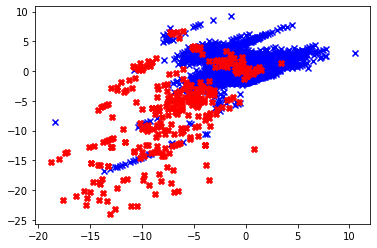

In [ ]:
import matplotlib.pyplot as plt
fpr_train=0
tpr_train=0
fpr_val=0
tpr_val=0
w= best_three[0:2]
plt.scatter(X_train[w[0]][y_train==0],X_train[w[1]][y_train==0], marker="x",c='blue')
plt.scatter(X_train[w[0]][y_train==1],X_train[w[1]][y_train==1], marker="X",c='red')
#plot labels

print("Based on the plot, the n_components is decided to be 2")
gm_1 = GaussianMixture(n_components=2)
gm_1.fit(X_train[w].to_numpy())
c = gm_1.score_samples(X_train[w].to_numpy())
d = gm_1.score_samples(X_val[w].to_numpy())
fpr_train, tpr_train, _ = roc_curve(y_train, -1 * c)
fpr_val, tpr_val, _ = roc_curve(y_val, -1 * d)
auc_train_two_feature = auc(fpr_train, tpr_train)
auc_val_two_feature = auc(fpr_val, tpr_val)
print("AUC for training :", auc_train_two_feature)
print("AUC for validation :", auc_val_two_feature)

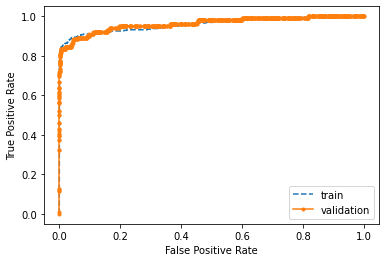

In [ ]:
plt.plot(fpr_train, tpr_train, linestyle = '--', label='train')
plt.plot(fpr_val, tpr_val, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
t = [('V14','V17'),('V14','V10'), ('V17','V10'), ('V14','V16') ]
auc_train_two=[]
auc_val_two=[]
for i in t:
  fpr_train=0
  tpr_train=0
  fpr_val=0
  tpr_val=0
  gm_1 = GaussianMixture(n_components=2)
  gm_1.fit(X_train[w].to_numpy())
  #gm_1.fit(X_train['V14', 'V17'].to_numpy().reshape(-1,1), X_train['V17'].to_numpy().reshape(-1,1))
  #print(X_train[w].to_numpy())
  c = gm_1.score_samples(X_train[w].to_numpy())
  d = gm_1.score_samples(X_val[w].to_numpy())
  fpr_train, tpr_train, _ = roc_curve(y_train, -1 * c)
  fpr_val, tpr_val, _ = roc_curve(y_val, -1 * d)
  auc_train_two_feature = auc(fpr_train, tpr_train)
  auc_val_two_feature = auc(fpr_val, tpr_val)
  print("AUC for ", i, "training :", auc_train_two_feature)
  print("AUC for ", i, "validation :", auc_val_two_feature)
  auc_train_two.append(auc_train_two_feature)
  auc_val_two.append(auc_val_two_feature)
  #plt.plot(fpr_train, tpr_train, linestyle = '--', label='train')
  #plt.plot(fpr_val, tpr_val, marker='.', label='validation')
  #plt.xlabel('False Positive Rate')
  #plt.ylabel('True Positive Rate')
  #plt.legend()
  #plt.show()
print("AUC for training", auc_train_two)
print("AUC for validation", auc_val_two)
max_auc_val = max(auc_val_two)
max_auc_val_index = auc_val_two.index(max_auc_val)
#print(max_auc_val, max_auc_val_index)
set_max = t[max_auc_val_index]
print("the set with the highest AUC on the validation set: ", set_max)

AUC for  ('V14', 'V17') training : 0.9578420640169356
AUC for  ('V14', 'V17') validation : 0.9626943006968167
AUC for  ('V14', 'V10') training : 0.9578423833094317
AUC for  ('V14', 'V10') validation : 0.9626958525504541
AUC for  ('V17', 'V10') training : 0.9578428034311375
AUC for  ('V17', 'V10') validation : 0.9626965422631819
AUC for  ('V14', 'V16') training : 0.957856919520444
AUC for  ('V14', 'V16') validation : 0.9627222340622907
AUC for training [0.9578420640169356, 0.9578423833094317, 0.9578428034311375, 0.957856919520444]
AUC for validation [0.9626943006968167, 0.9626958525504541, 0.9626965422631819, 0.9627222340622907]
the set with the highest AUC on the validation set:  ('V14', 'V16')


In [ ]:
tr = list(np.arange(-30,10,0.5))
v=list(set_max[:])
h={}
sort_h=[]
maximum_tr_=[]
gm_1.fit(X_train[v].to_numpy())
d = gm_1.score_samples(X_val[v].to_numpy())
f1_best=[]
for j in tr:
  f1score = f1_score(y_val, d < j)
  h[j]=f1score
#print(h)
sort_h=(sorted(h.items(), key=lambda a: a[1]))
#print(sort_h)
sorted_tr_=[]
sorted_f1_=[]
for k in range (0,len(sort_h)):
  sorted_tr_.append(sort_h[k][0])
  sorted_f1_.append(sort_h[k][1])
maximum_tr_=sorted_tr_[-1]
print("the best treshold value is", maximum_tr_)

the best treshold value is -13.5


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

Answer 6: The AUC for this model cannot be reported because the G1 model is fit on only non-fraudulent transactions and G2 model is fit on only fraudulent transactions, therefore the samples for the models will not have true positive and true negative. The AUC can be plotted on TPR vs FPR, therefore without true positive or true negative AUC cannot be reported.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
array_list = []
for i in range (0,10):
  array_list.append(i/10)
print(array_list)
G1 = GaussianMixture( n_components=1)
G2 = GaussianMixture( n_components=1)
best_precision_val=[]
best_recall_val=[]
best_f1_val=[]
best_c_val=[]
best_precision_train=[]
best_recall_train=[]
best_f1_train=[]
best_c_train=[]

#validation
for feat in features:
  G1.fit(X_train[feat][y_train==0].to_numpy().reshape(-1,1))
  G2.fit(X_train[feat][y_train==1].to_numpy().reshape(-1,1))
  S1 = G1.score_samples(X_val[feat].to_numpy().reshape(-1,1))
  S2 = G2.score_samples(X_val[feat].to_numpy().reshape(-1,1))
  precision_list_val=[]
  recall_list_val=[]
  f1_score_list_val=[]
  precision_list_train=[]
  recall_list_train=[]
  f1_score_list_train=[]
  for c in array_list:
    pr_val = precision_score(y_val, S1<(c*S2))
    rc_val = recall_score(y_val, S1<(c*S2))
    f1_val = f1_score(y_val, S1<(c*S2))
    precision_list_val.append(pr_val)
    recall_list_val.append(rc_val)
    f1_score_list_val.append(f1_val)
  #print("precision: ", precision_list)
  #print("recall: ", recall_list)
  #print("f1 score: ", f1_score_list)
  max_f1_val = max(f1_score_list_val)
  best_f1_val.append(max_f1_val)   #best f1 for each feature
  max_f1_index_val = f1_score_list_val.index(max_f1_val)
  best_precision_val.append(precision_list_val[max_f1_index_val]) #best precision for each feature
  best_recall_val.append(recall_list_val[max_f1_index_val]) #best recall for each feature
  #print(max_f1_val, max_f1_index_val)
  optimal_c_val = array_list[max_f1_index_val]
  best_c_val.append(optimal_c_val)  #best c value for each feature
  #print("optimal c value: ", optimal_c_val, "for ", feat)
print("best precision for validation", best_precision_val)
print("best recall for validation", best_recall_val)
print("best f1 for validation", best_f1_val)
print("best c for validation", best_c_val)

#training
precision_list_train=[]
recall_list_train=[]
f1_score_list_train=[]
for i,feat in enumerate(features):
  G1.fit(X_train[feat][y_train==0].to_numpy().reshape(-1,1))
  G2.fit(X_train[feat][y_train==1].to_numpy().reshape(-1,1))
  S1 = G1.score_samples(X_train[feat].to_numpy().reshape(-1,1))
  S2 = G2.score_samples(X_train[feat].to_numpy().reshape(-1,1))
  pr_train = precision_score(y_train, S1<(best_c_val[i]*S2))
  rc_train = recall_score(y_train, S1<(best_c_val[i]*S2))
  f1_train = f1_score(y_train, S1<(best_c_val[i]*S2))
  precision_list_train.append(pr_train)
  recall_list_train.append(rc_train)
  f1_score_list_train.append(f1_train)
  #print("precision: ", precision_list)
  #print("recall: ", recall_list)
  #print("f1 score: ", f1_score_list)
print("best precision for training", precision_list_train)
print("best recall for training", recall_list_train)
print("best f1 for training", f1_score_list_train)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best precision for validation [0.015160703456640388, 0.018020594965675058, 0.027407407407407408, 0.019674520281758562, 0.012474012474012475, 0.004722300535663942, 0.03659174072138003, 0.01810385898046689, 0.009383986680793098, 0.04383116883116883, 0.020700230002555584, 0.02348613469156763, 0.0018276655166748808, 0.040627885503231764, 0.0018730428165881355, 0.020902090209020903, 0.04855562384757222, 0.010232048236798831, 0.005155605549306337, 0.008317737575379496, 0.023084479371316306, 0.002540024630541872, 0.009163802978235968, 0.0021614818462885443, 0.0027030872101294636, 0.0018131435804454176, 0.017422867513611617, 0.014455509155155798]
best recall for validation [0.49019607843137253, 0.6176470588235294, 0.7254901960784313, 0.7941176470588235, 0.47058823529411764, 0.6568627450980392, 0.6862745098039216, 0.37254901960784315, 0.6078431372549019, 0.7941176470588235, 0.7941176470588235, 0.8137254901960784, 0.8725490196078431, 0.862745098

In [ ]:
import pandas as pd
data_train_val = {'Features': features, 'c value': best_c_val, 'F1 score_train': f1_score_list_train, 'Precision_train': precision_list_train, 'Recall_train': recall_list_train, 'F1 score_val': best_f1_val, 'Precision_val': best_precision_val, 'Recall_val': best_recall_val}
table_train_val=pd.DataFrame(data=data_train_val)
Best_f1_val = table_train_val.loc[table_train_val['F1 score_val']==max(best_f1_val)]
Best_pr_val = table_train_val.loc[table_train_val['Precision_val']==max(best_precision_val)]
Best_rc_val = table_train_val.loc[table_train_val['Recall_val']==max(best_recall_val)]
Best_f1_train = table_train_val.loc[table_train_val['F1 score_train']==max(f1_score_list_train)]
Best_pr_train = table_train_val.loc[table_train_val['Precision_train']==max(precision_list_train)]
Best_rc_train = table_train_val.loc[table_train_val['Recall_train']==max(recall_list_train)]
table_train_val

,Features,c value,F1 score_train,Precision_train,Recall_train,F1 score_val,Precision_val,Recall_val
0,V1,0.9,0.027549,0.014203,0.456522,0.029412,0.015161,0.490196
1,V2,0.9,0.033878,0.017419,0.614907,0.035019,0.018021,0.617647
2,V3,0.9,0.050161,0.025981,0.723602,0.052819,0.027407,0.725490
3,V4,0.9,0.038248,0.019584,0.813665,0.038398,0.019675,0.794118
4,V5,0.9,0.023436,0.012027,0.456522,0.024304,0.012474,0.470588
5,V6,0.9,0.009218,0.004641,0.661491,0.009377,0.004722,0.656863
6,V7,0.9,0.060928,0.032078,0.605590,0.069479,0.036592,0.686275
7,V8,0.9,0.028556,0.014945,0.319876,0.034530,0.018104,0.372549
8,V9,0.9,0.019217,0.009750,0.661491,0.018483,0.009384,0.607843
9,V10,0.9,0.081122,0.042656,0.826087,0.083077,0.043831,0.794118


In [ ]:
print("the values of the best F1 Score, Precision for training and validation is \n")
Best_f1_train

the values of the best F1 Score, Precision for training and validation is 



,Features,c value,F1 score_train,Precision_train,Recall_train,F1 score_val,Precision_val,Recall_val
16,V17,0.9,0.094424,0.050085,0.822981,0.091382,0.048556,0.77451


In [ ]:
print("the values of the best Recall for training is \n")
Best_rc_train

the values of the best Recall for training is 



,Features,c value,F1 score_train,Precision_train,Recall_train,F1 score_val,Precision_val,Recall_val
13,V14,0.9,0.075696,0.03957,0.869565,0.077601,0.040628,0.862745


In [ ]:
print("the values of the best Recall for validation is \n")
Best_rc_val

the values of the best Recall for validation is 



,Features,c value,F1 score_train,Precision_train,Recall_train,F1 score_val,Precision_val,Recall_val
12,V13,0.9,0.003468,0.001737,0.854037,0.003648,0.001828,0.872549


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [ ]:
arr=[]
arr = list(np.arange(-30,10,0.5))
G1 = GaussianMixture( n_components=1)
G2 = GaussianMixture( n_components=2)
feat_a = [['V17', 'V18', 'V19'], ['V12','V14','V16'], ['V1', 'V2', 'V3', 'V4'], ['V5', 'V6', 'V7', 'V8'], ['V10', 'V11'], ['V9', 'V12'], ['V21', 'V27', 'V28'], ['V12', 'V14', 'V17', 'V18', 'V19'], ['V3', 'V4', 'V11', 'V12'], ['V14', 'V16', 'V17', 'V18'], ['V12', 'V14', 'V16', 'V18'], ['V12', 'V14', 'V18']]
auc_train_S1_f=[]
auc_train_S2_f=[]
auc_val_S1_f=[]
auc_val_S2_f=[]

#validation precision, recall and f1 score
best_f1_val_f=[]
best_recall_val_f=[]
best_precision_val_f=[]
best_c_val_f=[]
for i in feat_a:
  G1.fit(X_train[i][y_train==0].to_numpy())
  G2.fit(X_train[i][y_train==1].to_numpy())
  S1_val = G1.score_samples(X_val[i].to_numpy())
  S2_val = G2.score_samples(X_val[i].to_numpy())
  precision_list_val_f=[]
  recall_list_val_f=[]
  f1_score_list_val_f=[]
  for j in arr:
    pr_val_f = precision_score(y_val, S1_val<(j*S2_val))
    rc_val_f = recall_score(y_val, S1_val<(j*S2_val))
    f1_val_f = f1_score(y_val, S1_val<(j*S2_val))
    precision_list_val_f.append(pr_val_f)
    recall_list_val_f.append(rc_val_f)
    f1_score_list_val_f.append(f1_val_f)
  #print("precision: ", precision_list_val_f)
  #print("recall: ", recall_list_val_f)
  #print("f1 score: ", f1_score_list_val_f)
  max_f1_val_f = max(f1_score_list_val_f)
  best_f1_val_f.append(max_f1_val_f)   #best f1 for each feature list
  max_f1_index_val_f = f1_score_list_val_f.index(max_f1_val_f)
  best_precision_val_f.append(precision_list_val_f[max_f1_index_val_f]) #best precision for each feature list
  best_recall_val_f.append(recall_list_val_f[max_f1_index_val_f]) #best recall for each feature list
  optimal_c_val_f = arr[max_f1_index_val_f]
  best_c_val_f.append(optimal_c_val_f)  #best c value for each feature list
  #print("optimal c value: ", optimal_c_val_f, "for ", i)
print("best precision for validation", best_precision_val_f)
print("best recall for validation", best_recall_val_f)
print("best f1 for validation", best_f1_val_f)
print("best threshold for validation", best_c_val_f)

#training precision, recall and f1 score
# best_f1_train_f=[]
# best_recall_train_f=[]
# best_precision_train_f=[]
# best_c_train_f=[]
precision_list_train_f=[]
recall_list_train_f=[]
f1_score_list_train_f=[]
for k,i in enumerate(feat_a):
  G1.fit(X_train[i][y_train==0].to_numpy())
  G2.fit(X_train[i][y_train==1].to_numpy())
  S1_train = G1.score_samples(X_train[i].to_numpy())
  S2_train = G2.score_samples(X_train[i].to_numpy())
  pr_train_f = precision_score(y_train, S1_train<(best_c_val_f[k]*S2_train))
  rc_train_f = recall_score(y_train, S1_train<(best_c_val_f[k]*S2_train))
  f1_train_f = f1_score(y_train, S1_train<(best_c_val_f[k]*S2_train))
  precision_list_train_f.append(pr_train_f)
  recall_list_train_f.append(rc_train_f)
  f1_score_list_train_f.append(f1_train_f)
print("best precision for training", precision_list_train_f)
print("best recall for training", recall_list_train_f)
print("best f1 for training", f1_score_list_train_f)

best precision for validation [0.6262626262626263, 0.8505747126436781, 0.39669421487603307, 0.4418604651162791, 0.8846153846153846, 0.8356164383561644, 0.035161744022503515, 0.8202247191011236, 0.8192771084337349, 0.7752808988764045, 0.8372093023255814, 0.7676767676767676]
best recall for validation [0.6078431372549019, 0.7254901960784313, 0.47058823529411764, 0.18627450980392157, 0.6764705882352942, 0.5980392156862745, 0.24509803921568626, 0.7156862745098039, 0.6666666666666666, 0.6764705882352942, 0.7058823529411765, 0.7450980392156863]
best f1 for validation [0.6169154228855721, 0.783068783068783, 0.4304932735426009, 0.2620689655172414, 0.7666666666666666, 0.6971428571428572, 0.061500615006150054, 0.7643979057591622, 0.7351351351351351, 0.7225130890052356, 0.7659574468085107, 0.7562189054726367]
best threshold for validation [4.5, 5.0, 2.5, 9.5, 3.0, 3.5, 2.5, 6.0, 3.0, 7.0, 5.0, 4.0]
best precision for training [0.6134185303514377, 0.8287671232876712, 0.37721518987341773, 0.3333333

In [ ]:
data_train_val_f = {'Features': feat_a, 'Threshold': best_c_train_f, 'F1_score_train': f1_score_list_train_f, 'Precision_train': precision_list_train_f, 'Recall_train': recall_list_train_f, 'F1_score_val': best_f1_val_f, 'Precision_val': best_precision_val_f, 'Recall_val': best_recall_val_f}
table_train_val_f=pd.DataFrame(data=data_train_val_f)
q  = best_f1_val_f.index(max(best_f1_val_f))
z = feat_a[q]
print("The Features for the best f1 score val: ", z)
table_train_val_f

The Features for the best f1 score val:  ['V12', 'V14', 'V16']


,Features,Threshold,F1_score_train,Precision_train,Recall_train,F1_score_val,Precision_val,Recall_val
0,"[V17, V18, V19]",4.5,0.604724,0.613419,0.596273,0.616915,0.626263,0.607843
1,"[V12, V14, V16]",5.0,0.788274,0.828767,0.751553,0.783069,0.850575,0.725490
2,"[V1, V2, V3, V4]",3.0,0.415621,0.377215,0.462733,0.430493,0.396694,0.470588
3,"[V5, V6, V7, V8]",7.5,0.214737,0.333333,0.158385,0.262069,0.441860,0.186275
4,"[V10, V11]",2.5,0.728843,0.821012,0.655280,0.766667,0.884615,0.676471
5,"[V9, V12]",3.5,0.704425,0.818930,0.618012,0.697143,0.835616,0.598039
6,"[V21, V27, V28]",8.0,0.047974,0.026782,0.229814,0.061501,0.035162,0.245098
7,"[V12, V14, V17, V18, V19]",6.5,0.755700,0.794521,0.720497,0.764398,0.820225,0.715686
8,"[V3, V4, V11, V12]",3.0,0.731219,0.790614,0.680124,0.735135,0.819277,0.666667
9,"[V14, V16, V17, V18]",7.5,0.713376,0.732026,0.695652,0.722513,0.775281,0.676471


In [ ]:
Best_f1_VAL = table_train_val_f.loc[table_train_val_f['F1_score_val']==max(best_f1_val_f)]
Best_pr_VAL = table_train_val_f.loc[table_train_val_f['Precision_val']==max(best_precision_val_f)]
Best_rc_VAL = table_train_val_f.loc[table_train_val_f['Recall_val']==max(best_recall_val_f)]
Best_f1_TRAIN = table_train_val_f.loc[table_train_val_f['F1_score_train']==max(f1_score_list_train_f)]
Best_pr_TRAIN = table_train_val_f.loc[table_train_val_f['Precision_train']==max(precision_list_train_f)]
Best_rc_TRAIN = table_train_val_f.loc[table_train_val_f['Recall_train']==max(recall_list_train_f)]
print("the values of the best Precision for Validation is \n")
Best_pr_VAL

the values of the best Precision for Validation is 



,Features,Threshold,F1_score_train,Precision_train,Recall_train,F1_score_val,Precision_val,Recall_val
4,"[V10, V11]",2.5,0.728843,0.821012,0.65528,0.766667,0.884615,0.676471


In [ ]:
print("the values of the best F1 score for Validation and Training is \n")
Best_f1_VAL

the values of the best F1 score for Validation and Training is 



,Features,Threshold,F1_score_train,Precision_train,Recall_train,F1_score_val,Precision_val,Recall_val
1,"[V12, V14, V16]",5.0,0.788274,0.828767,0.751553,0.783069,0.850575,0.72549


In [ ]:
print("the values of the best Precision for Training is \n")
Best_pr_TRAIN

the values of the best Precision for Training is 



,Features,Threshold,F1_score_train,Precision_train,Recall_train,F1_score_val,Precision_val,Recall_val
1,"[V12, V14, V16]",5.0,0.788274,0.828767,0.751553,0.783069,0.850575,0.72549


In [ ]:
print("the values of the best Recall for Validation and Training is \n")
Best_pr_TRAIN

the values of the best Recall for Validation and Training is 



,Features,Threshold,F1_score_train,Precision_train,Recall_train,F1_score_val,Precision_val,Recall_val
1,"[V12, V14, V16]",5.0,0.788274,0.828767,0.751553,0.783069,0.850575,0.72549


Overall, Model with three features [V12, V14, V16] performs better for 2 gaussian model with single component for valid transaction and 2 component for fraudulent transaction.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [ ]:
best_feature = z
G1_final = GaussianMixture( n_components=1)
G2_final = GaussianMixture( n_components=2)
G1_final.fit(X_train[best_feature][y_train==0].to_numpy())
G2_final.fit(X_train[best_feature][y_train==1].to_numpy())
S1_val_f = G1.score_samples(X_val[best_feature].to_numpy())
S2_val_f = G2.score_samples(X_val[best_feature].to_numpy())
S1_test_f = G1.score_samples(X_test[best_feature].to_numpy())
S2_test_f = G2.score_samples(X_test[best_feature].to_numpy())

#optimal threshold
f1_score_list_val_final=[]
for c in arr:
  f1_val_final = f1_score(y_val, S1_val_f<(c*S2_val_f))
  f1_score_list_val_final.append(f1_val_final)
max_f1_val_f = max(f1_score_list_val_final)
max_f1_index_val_final = f1_score_list_val_final.index(max_f1_val_f)
optimal_c_val_final = arr[max_f1_index_val_final]
#print(max_f1_val_f, optimal_c_val_final)

#F1 Score, Precision and Recall
f1_test = f1_score(y_test, S1_test_f<optimal_c_val_final)
pr_test = precision_score(y_test, S1_test_f<optimal_c_val_final)
rc_test = recall_score(y_test, S1_test_f<optimal_c_val_final)
print("F1 score on test set: ", f1_test)
print("Precision on test set: ", pr_test)
print("Recall on test set: ", rc_test)

F1 score on test set:  0.0031783126898808126
Precision on test set:  0.0015916857825008192
Recall on test set:  1.0
